In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Download & Load the Data
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")
print("\nPath to dataset files:", path)

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    full_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(full_path)
    print(f"\nData Loaded Successfully: {csv_files[0]}")
else:
    print("\nError: No CSV file found in the downloaded folder")

Using Colab cache for faster access to the 'ibm-hr-analytics-attrition-dataset' dataset.

Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset

Data Loaded Successfully: WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
#Data Cleaning $ PreProcessing

useless_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']

df.drop(columns=useless_cols, inplace=True, errors='ignore')

# Encoding Categorical Variables

df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

df['OverTime_Numeric'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Gender_Numeric'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Verify the Result
print("\n--- Preprocessing Summary ---")

print(f"Original Shape: (1470, 35) -> New Shape: {df.shape}")
print(f"Missing Values: {df.isnull().sum().sum()}") # Should be 0
print("\nPreview of Processed Columns:")
df[['Attrition', 'Attrition_Numeric', 'OverTime', 'OverTime_Numeric']].head()


--- Preprocessing Summary ---
Original Shape: (1470, 35) -> New Shape: (1470, 34)
Missing Values: 0

Preview of Processed Columns:


,Attrition,Attrition_Numeric,OverTime,OverTime_Numeric
0,Yes,1,Yes,1
1,No,0,No,0
2,Yes,1,Yes,1
3,No,0,Yes,1
4,No,0,No,0


In [3]:
# 1. Calculate the Overall Attrition Rate
attrition_rate = df['Attrition_Numeric'].mean() * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 16.12%


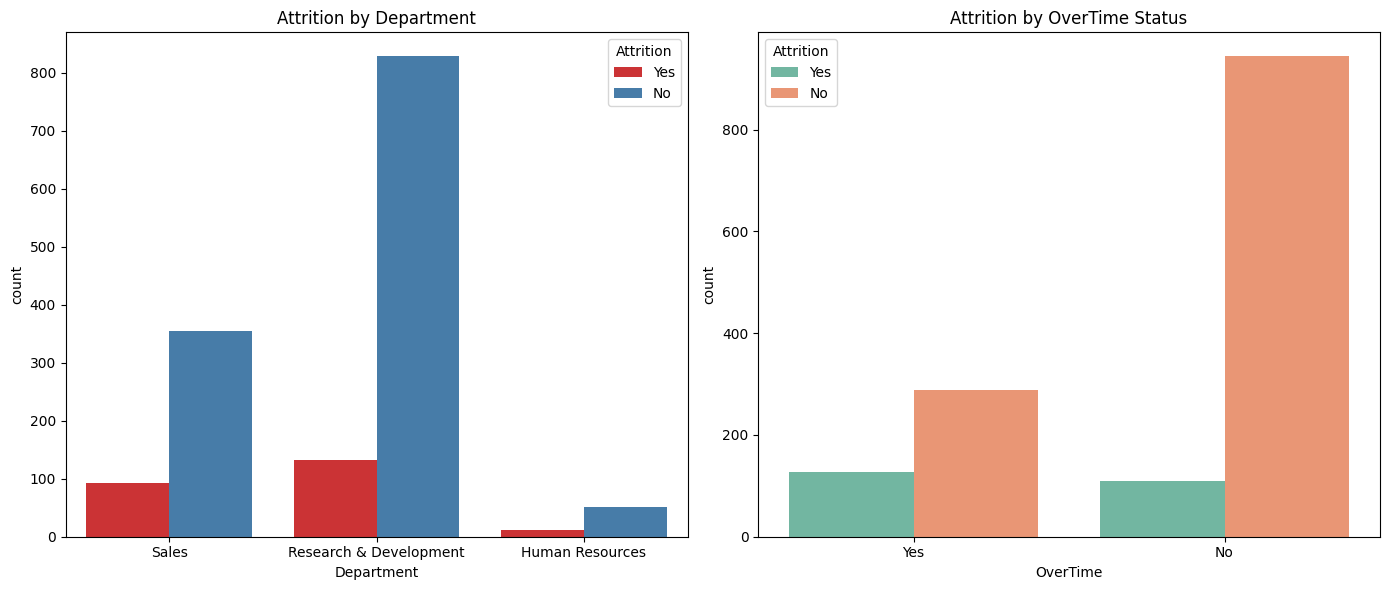

In [4]:
# 2. Visualization: Who is leaving? (Categorical)
plt.figure(figsize=(14, 6))

# Chart A: Attrition by Department
plt.subplot(1, 2, 1)
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition by Department')

# Chart B: Attrition by OverTime ( The "Burnout" Check)
plt.subplot(1, 2, 2)
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by OverTime Status')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3302140734.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition']=='No']['MonthlyIncome'], label='Stayed', shade=True, color='blue')
/tmp/ipython-input-3302140734.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition']=='Yes']['MonthlyIncome'], label='Left', shade=True, color='red')
/tmp/ipython-input-3302140734.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=df, palette='coolwarm')


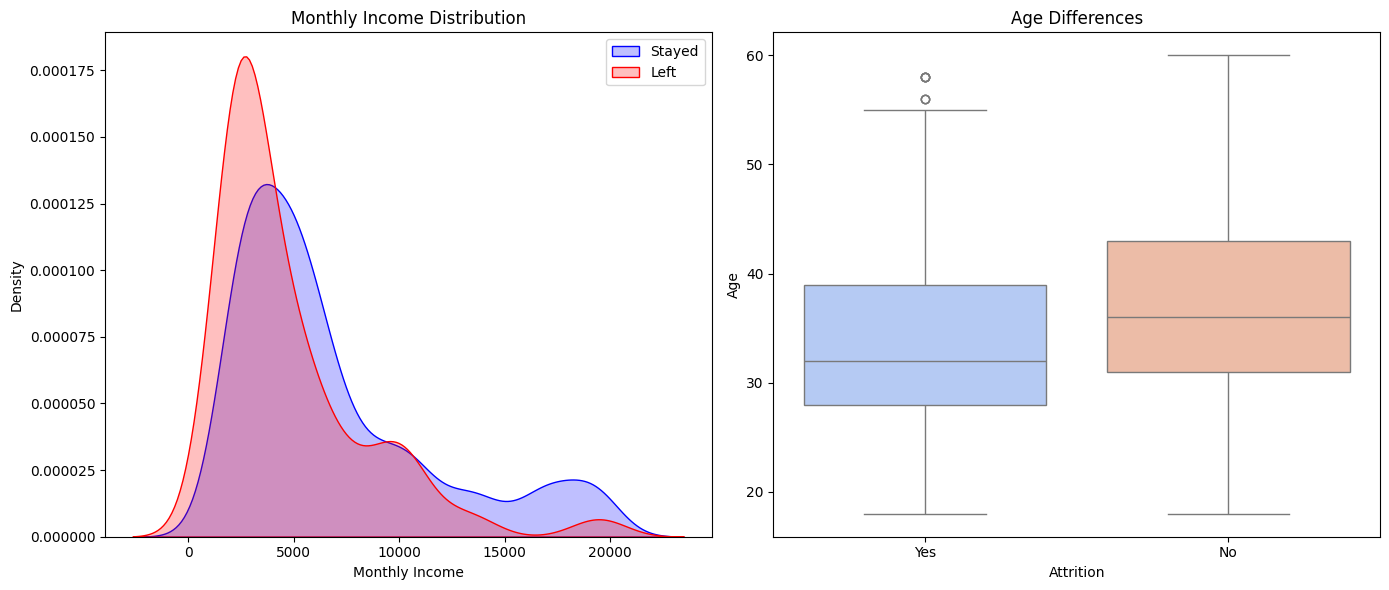

In [5]:
# 3. Visualization: Money & Age (Numerical) ---
plt.figure(figsize=(14, 6))

# Chart C: Monthly Income Distribution (Leavers vs Stayers)
# This shows if people who leave are paid less
plt.subplot(1, 2, 1)
sns.kdeplot(df[df['Attrition']=='No']['MonthlyIncome'], label='Stayed', shade=True, color='blue')
sns.kdeplot(df[df['Attrition']=='Yes']['MonthlyIncome'], label='Left', shade=True, color='red')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.legend()

# Chart D: Age Distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='Age', data=df, palette='coolwarm')
plt.title('Age Differences')

plt.tight_layout()
plt.show()

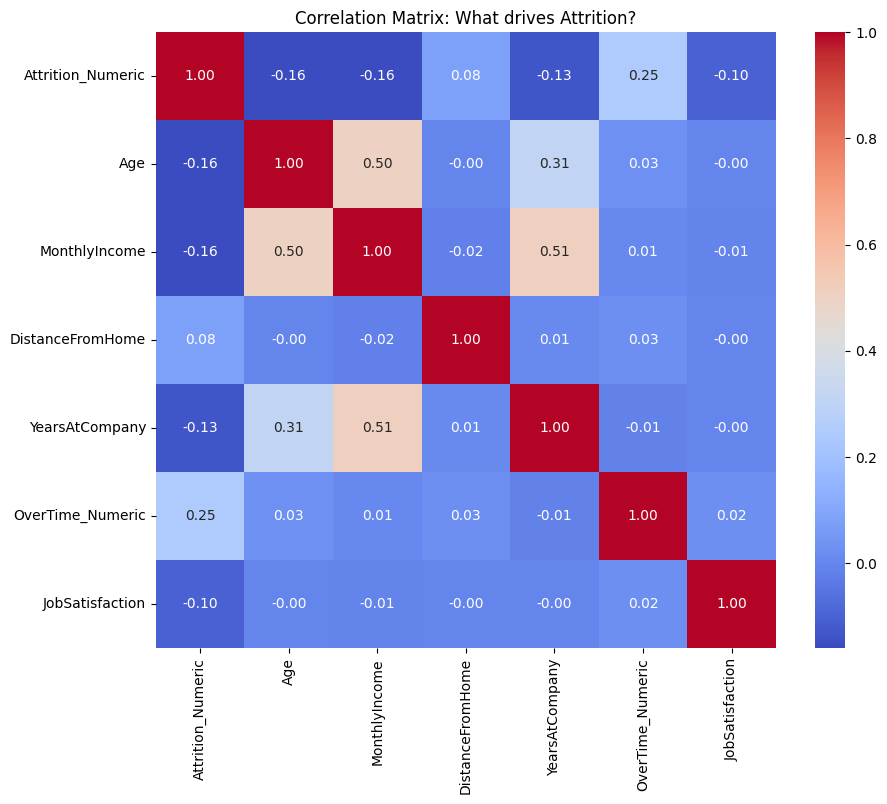

In [6]:
from scipy.stats import ttest_ind

# 4. Correlation Matrix ---

cols_for_corr = ['Attrition_Numeric', 'Age', 'MonthlyIncome',
                 'DistanceFromHome', 'YearsAtCompany',
                 'OverTime_Numeric', 'JobSatisfaction']

plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: What drives Attrition?')
plt.show()

In [7]:
# 5.Hypothesis Testing (T-Test) ---

# Question: Is the salary difference between Leavers and Stayers statistically significant?

# Group 1: Income of people who LEFT
income_left = df[df['Attrition'] == 'Yes']['MonthlyIncome']

# Group 2: Income of people who STAYED
income_stayed = df[df['Attrition'] == 'No']['MonthlyIncome']

# Run T-Test
t_stat, p_val = ttest_ind(income_left, income_stayed)

print("\n--- STATISTICAL PROOF ---")
print(f"Average Income (Stayed): ${income_stayed.mean():.2f}")
print(f"Average Income (Left):   ${income_left.mean():.2f}")
print(f"P-Value: {p_val:.5f}")

if p_val < 0.05:
    print("Result: The difference is STATISTICALLY SIGNIFICANT. Low income drives attrition.")
else:
    print("Result: No significant difference found.")


--- STATISTICAL PROOF ---
Average Income (Stayed): $6832.74
Average Income (Left):   $4787.09
P-Value: 0.00000
Result: The difference is STATISTICALLY SIGNIFICANT. Low income drives attrition.


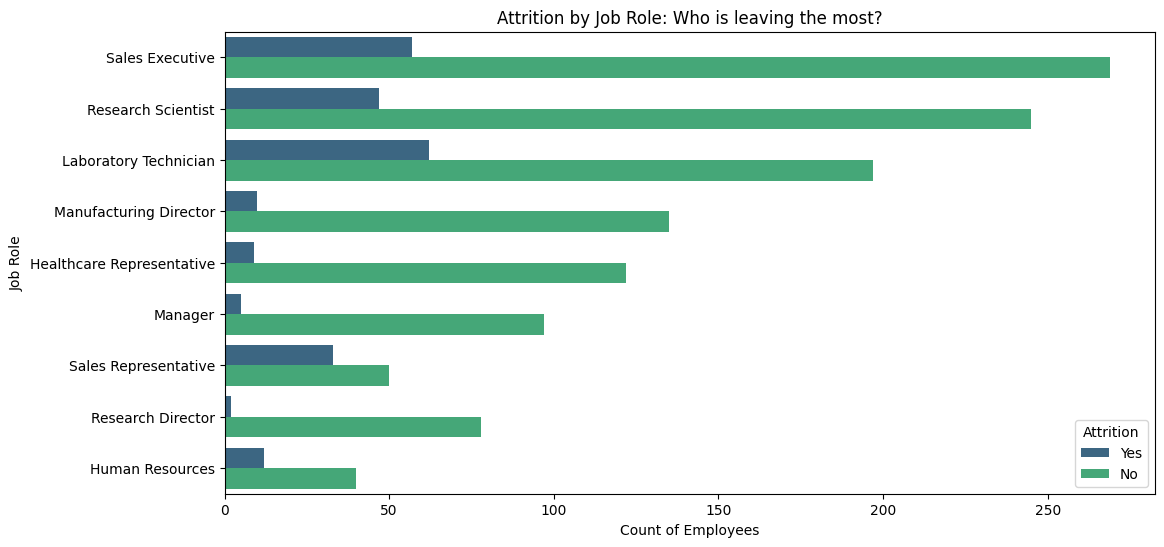

In [8]:
# 6. Attrition by Job Role (Bar Chart) ---

plt.figure(figsize=(12, 6))

sns.countplot(y='JobRole', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition by Job Role: Who is leaving the most?')
plt.xlabel('Count of Employees')
plt.ylabel('Job Role')
plt.show()